In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./archive/match_data.csv')

C:\Users\kaush\AppData\Local\Temp\ipykernel_8504\1225302202.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./archive/match_data.csv')


In [3]:
df

,match_id,season,start_date,stadium,innings,over,batting_team,bowling_team,striker,non_striker,...,other_wicket_type,other_player_dismissed,batting_team_short_name,bowling_team_short_name,venue,total_run,final_total_runs,is_wicket,wickets,runs
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,NaN,KKR,RCB,Bengaluru,1,222,0,0,1
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,KKR,RCB,Bengaluru,0,222,0,0,1
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,KKR,RCB,Bengaluru,1,222,0,0,2
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,KKR,RCB,Bengaluru,0,222,0,0,2
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,KKR,RCB,Bengaluru,0,222,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,GT,RR,Ahmedabad,1,133,0,3,124
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,GT,RR,Ahmedabad,0,133,0,3,124
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,GT,RR,Ahmedabad,1,133,0,3,125
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,GT,RR,Ahmedabad,2,133,0,3,127


In [ ]:

columns_to_remove = ['match_id', 'season', 'striker', 'non_striker', 'bowler',
                     'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
                     'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
                     'other_player_dismissed', 'batting_team_short_name', 'start_date',
                     'bowling_team_short_name', 'total_run', 'is_wicket', 'stadium']


try:
    df1 = df.drop(columns=columns_to_remove)[["batting_team", "bowling_team", "venue",
                                              "innings", "over", "runs", "wickets", "final_total_runs"]]
    print(df1.head())
except KeyError as e:
    print(f"KeyError: {e}. Ensure the specified columns exist in the dataset.")


            batting_team                 bowling_team      venue  innings  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Bengaluru        1   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Bengaluru        1   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Bengaluru        1   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Bengaluru        1   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Bengaluru        1   

   over  runs  wickets  final_total_runs  
0   0.1     1        0               222  
1   0.2     1        0               222  
2   0.3     2        0               222  
3   0.4     2        0               222  
4   0.5     2        0               222  


Feature encoding

In [ ]:

encoded_teams = {
    k: v for v, k in enumerate(
        pd.concat([df1['batting_team'], df1['bowling_team']]).unique(), 0
    )
}

# Display the encoded teams
encoded_teams


{'Kolkata Knight Riders': 0,
 'Royal Challengers Bangalore': 1,
 'Chennai Super Kings': 2,
 'Punjab Kings': 3,
 'Rajasthan Royals': 4,
 'Delhi Capitals': 5,
 'Sunrisers Hyderabad': 6,
 'Mumbai Indians': 7,
 'Kochi Tuskers Kerala': 8,
 'Rising Pune Supergiants': 9,
 'Gujarat Titans': 10,
 'Lucknow Super Giants': 11}

In [6]:
df1['batting_team'] = df1['batting_team'].map(encoded_teams)
df1['bowling_team'] = df1['bowling_team'].map(encoded_teams)
df1.sample(10)

,batting_team,bowling_team,venue,innings,over,runs,wickets,final_total_runs
110439,1,2,Bengaluru,2,7.6,61,2,154
10824,3,6,Mohali,2,15.1,136,2,178
210497,3,2,Mumbai,1,4.1,37,2,180
18849,5,2,"Johannesburg, South Africa",2,17.6,133,7,145
59858,5,1,Bengaluru,2,4.5,40,1,137
42656,7,5,Delhi,2,3.2,15,1,99
172199,4,0,Kolkata,2,10.3,89,1,144
225870,10,4,Ahmedabad,2,4.5,24,2,133
154642,2,3,Chennai,1,2.6,26,0,160
120372,7,0,Mumbai,1,7.2,49,3,171


prepertation of variables

In [7]:
X =df1.drop(columns=['final_total_runs'],axis=1)
print("Data Shape is :",X.shape)
X.head()

Data Shape is : (225954, 7)


,batting_team,bowling_team,venue,innings,over,runs,wickets
0,0,1,Bengaluru,1,0.1,1,0
1,0,1,Bengaluru,1,0.2,1,0
2,0,1,Bengaluru,1,0.3,2,0
3,0,1,Bengaluru,1,0.4,2,0
4,0,1,Bengaluru,1,0.5,2,0


In [8]:
Y = df1['final_total_runs']
Y.head()

0    222
1    222
2    222
3    222
4    222
Name: final_total_runs, dtype: int64

onehotencoding

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder


num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


encoder = OneHotEncoder()


encoded_features = encoder.fit_transform(X[cat_features])


encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(cat_features))


encoded_features_df.columns = [col.split("venue_")[1] for col in encoded_features_df.columns]


X = pd.concat([X.drop(cat_features, axis=1), encoded_features_df], axis=1)


X.head()

,batting_team,bowling_team,innings,over,runs,wickets,"Abu Dhabi, UAE",Ahmedabad,Bengaluru,"Bloemfontein, South Africa",...,"Kimberley, South Africa",Kolkata,Mohali,Mumbai,Pune,Raipur,Rajkot,Ranchi,"Sharjah, UAE",Visakhapatnam
0,0,1,1,0.1,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0.2,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0.3,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0.4,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.5,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X.columns

Index(['batting_team', 'bowling_team', 'innings', 'over', 'runs', 'wickets',
       'Abu Dhabi, UAE', 'Ahmedabad', 'Bengaluru',
       'Bloemfontein, South Africa', 'Cape Town, South Africa',
       'Centurion, South Africa', 'Chennai', 'Cuttack', 'Delhi', 'Dharamshala',
       'Dubai, UAE', 'Durban, KwaZulu-Natal, South Africa',
       'East London, Eastern Cape, South Africa', 'Gqeberha, South Africa',
       'Hyderabad', 'Indore', 'Jaipur', 'Jamtha', 'Johannesburg, South Africa',
       'Kanpur', 'Kimberley, South Africa', 'Kolkata', 'Mohali', 'Mumbai',
       'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah, UAE', 'Visakhapatnam'],
      dtype='object')

seperating dataset into test and train

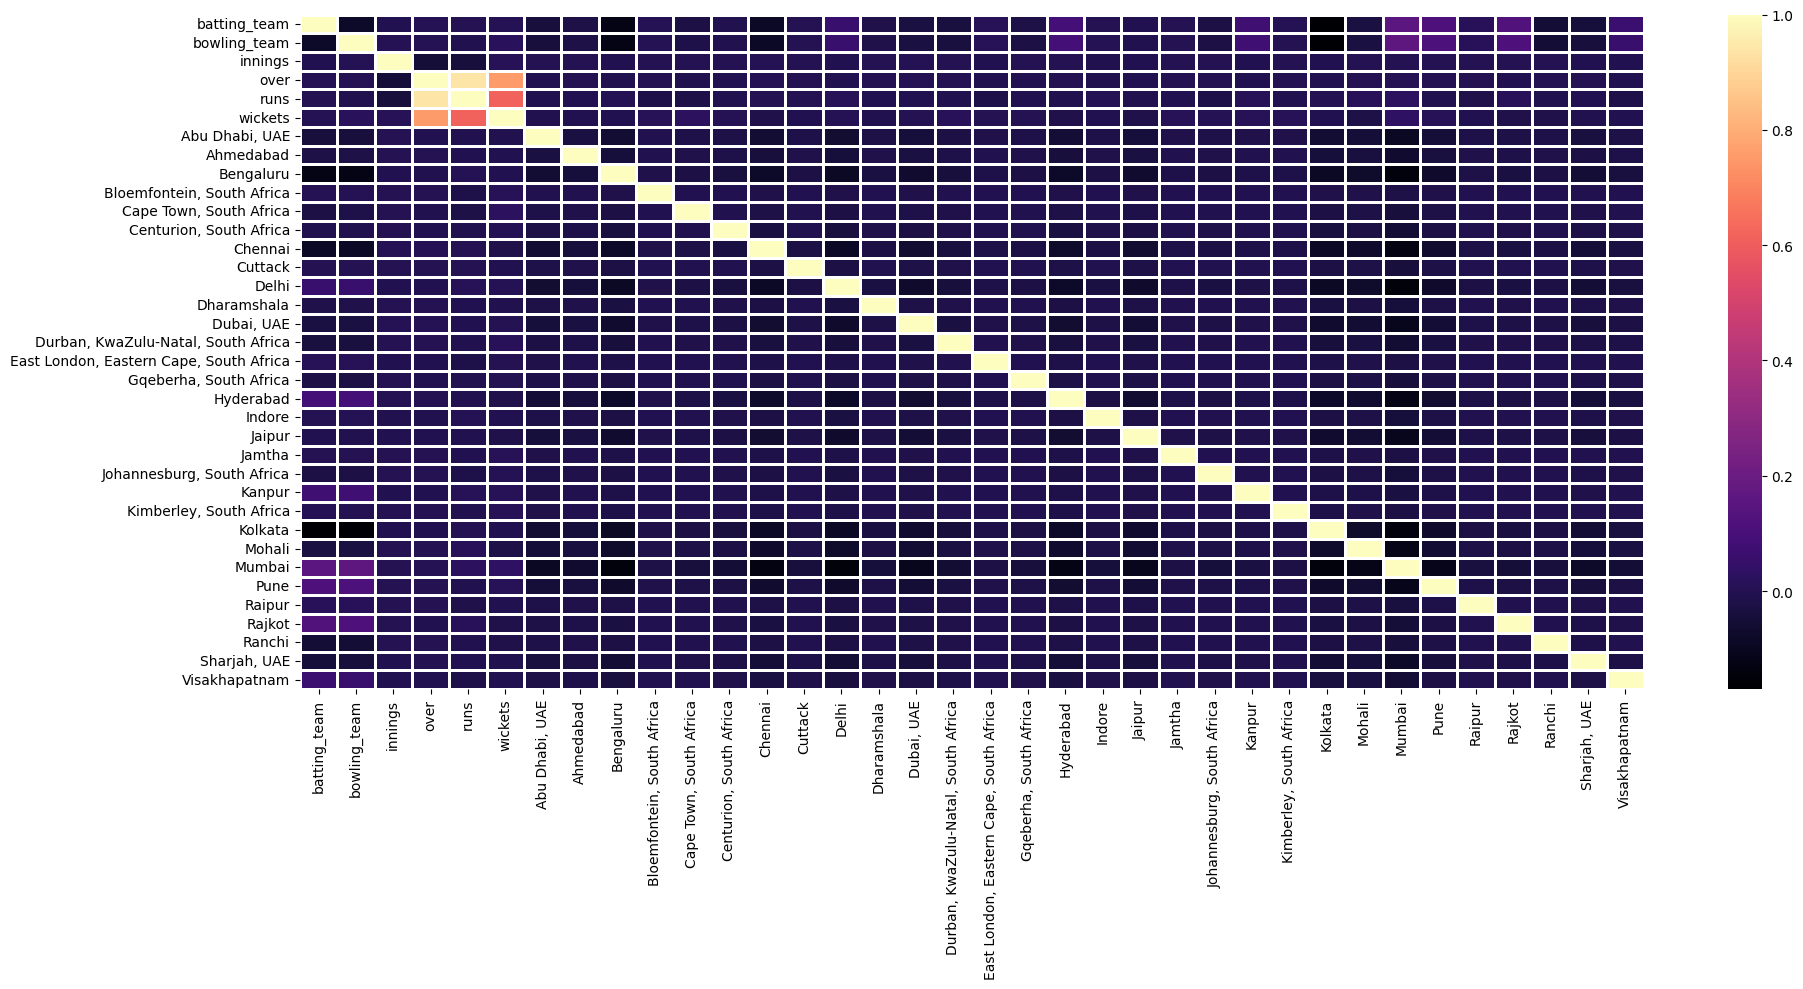

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_numeric = X.select_dtypes(include=['number'])


corr_matrix = df_numeric.corr()


plt.rcParams['figure.figsize'] = [20, 10]


sns.heatmap(corr_matrix, annot=False, cmap='magma', linewidths=1)


plt.tight_layout()


plt.show()


In [ ]:
import pandas as pd


df_numeric = X.select_dtypes(include=['number'])


corr_matrix = df_numeric.corr()


corr_matrix_rounded = corr_matrix.round(4)


print(corr_matrix_rounded)


corr_matrix_rounded.to_csv('correlation_matrix.csv')


print("Correlation matrix saved to 'correlation_matrix.csv'")


                                         batting_team  bowling_team  innings  \
batting_team                                   1.0000       -0.0820  -0.0037   
bowling_team                                  -0.0820        1.0000   0.0061   
innings                                       -0.0037        0.0061   1.0000   
over                                           0.0051        0.0038  -0.0506   
runs                                           0.0012       -0.0064  -0.0387   
wickets                                        0.0038        0.0185   0.0085   
Abu Dhabi, UAE                                -0.0406       -0.0407   0.0002   
Ahmedabad                                     -0.0207       -0.0201   0.0007   
Bengaluru                                     -0.1266       -0.1286  -0.0037   
Bloemfontein, South Africa                     0.0044        0.0041   0.0013   
Cape Town, South Africa                       -0.0279       -0.0189  -0.0004   
Centurion, South Africa                 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# separate dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((180763, 36), (45191, 36))

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

creating evavulate function for all metrics

In [14]:
X

,batting_team,bowling_team,innings,over,runs,wickets,"Abu Dhabi, UAE",Ahmedabad,Bengaluru,"Bloemfontein, South Africa",...,"Kimberley, South Africa",Kolkata,Mohali,Mumbai,Pune,Raipur,Rajkot,Ranchi,"Sharjah, UAE",Visakhapatnam
0,0,1,1,0.1,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0.2,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0.3,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0.4,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.5,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,10,4,2,17.3,124,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225950,10,4,2,17.4,124,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225951,10,4,2,17.5,125,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225952,10,4,2,17.6,127,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X.to_csv('./archive/mt1h.csv', index=False)

model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso


from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import r2_score



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    
    
    
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  
}


for name, model in models.items():
    model.fit(X_train, Y_train)  
    y_pred = model.predict(X_test)  
    r2 = r2_score(Y_test, y_pred)  
    print(f'{name} R^2 score: {r2:.4f}')


Linear Regression R^2 score: 0.4357
Ridge Regression R^2 score: 0.4357
Lasso Regression R^2 score: 0.4165
Random Forest R^2 score: 0.3598
Neural Network (MLP) R^2 score: 0.6263


building random forest

In [ ]:
import numpy as np
import joblib  

class DecisionTreeRegressor:
    """
    A basic Decision Tree Regressor for use in the Random Forest.
    """

    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        """
        Fits the decision tree to the data.
        """
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        """
        Recursive function to build the decision tree.
        """
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)  

       
        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.mean(y) 

       
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        
        return {"feature": best_feature, "threshold": best_threshold,
                "left": left_tree, "right": right_tree}

    def _find_best_split(self, X, y):
        """
        Finds the best feature and threshold to split the data on.
        """
        best_feature = None
        best_threshold = None
        best_mse = float('inf')  

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

               
                left_mse = np.mean((y[left_indices] - np.mean(y[left_indices]))**2)
                right_mse = np.mean((y[right_indices] - np.mean(y[right_indices]))**2)
                mse = (len(y[left_indices]) * left_mse + len(y[right_indices]) * right_mse) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, X):
        """
        Predicts the target value for a given input.
        """
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _predict_row(self, row, tree):
        """
        Predicts the target value for a single row of input.
        """
        if isinstance(tree, dict):
            feature = tree['feature']
            threshold = tree['threshold']
            if row[feature] <= threshold:
                return self._predict_row(row, tree['left'])
            else:
                return self._predict_row(row, tree['right'])
        else:
            return tree  

class RandomForestRegressor:
    """
    A Random Forest Regressor built from scratch.
    """

    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features 
        self.trees = []

    def fit(self, X, y):
        """
        Fits the random forest to the data using bagging.
        """
        self.trees = []
        X = X.to_numpy()  
        y = y.to_numpy()  
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]

            
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """
        Predicts the target value by averaging predictions from all trees.
        """
        X = X.to_numpy()  
        predictions = np.array([tree.predict(X) for tree in self.trees])  
        return np.mean(predictions, axis=0)  

    def save_model(self, filename):
        """
        Save the model to a file using joblib.
        """
        joblib.dump(self, filename)
        print(f"Model saved to {filename}")

    @staticmethod
    def load_model(filename):
        """
        Load a saved model from a file using joblib.
        """
        return joblib.load(filename)




writing algo in combines

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape

((180763, 36), (45191, 36))

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf2 = RandomForestRegressor(n_estimators=200, max_depth=10)

rf2.fit(X_train, Y_train)

y_pred = rf2.predict(X_test)

y_pred_ceil = np.ceil(y_pred)

# Fit the model to the training data
# rf_regressor.fit(X_train, Y_train)

# Make predictions using the trained model
# y_pred_rf = rf_regressor.predict(X_test)

# Print or evaluate the predictions
print("Random Forest Predictions:", y_pred_ceil)


Random Forest Predictions: [176. 165. 142. ... 168. 144. 158.]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


mae = mean_absolute_error(Y_test, y_pred_ceil)


mse = mean_squared_error(Y_test, y_pred_ceil)


rmse = np.sqrt(mse)


r2 = r2_score(Y_test, y_pred_ceil)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 15.52408665442234
Mean Squared Error (MSE): 453.83153725299286
Root Mean Squared Error (RMSE): 21.303322211640907
R² Score: 0.4940


In [ ]:
import pickle


def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {filename}")


def load_model(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    print(f"Model loaded from {filename}")
    return model


save_model(rf2, 'random_forest_model.pkl')


Model saved to random_forest_model.pkl


In [ ]:
import numpy as np


encoded_teams = {
    "Kolkata Knight Riders": 0,
    "Royal Challengers Bangalore": 1,
    "Chennai Super Kings": 2,
    "Punjab Kings": 3,
    "Rajasthan Royals": 4,
    "Delhi Capitals": 5,
    "Sunrisers Hyderabad": 6,
    "Mumbai Indians": 7,
    "Kochi Tuskers Kerala": 8,
    "Rising Pune Supergiants": 9,
    "Gujarat Titans": 10,
    "Lucknow Super Giants": 
}

columns = [
    "batting_team", "bowling_team", "innings", "over", "runs", "wickets",
    "Abu Dhabi, UAE", "Ahmedabad", "Bengaluru", "Bloemfontein, South Africa",
    "Cape Town, South Africa", "Centurion, South Africa", "Chennai", "Cuttack",
    "Delhi", "Dharamshala", "Dubai, UAE", "Durban, KwaZulu-Natal, South Africa",
    "East London, Eastern Cape, South Africa", "Gqeberha, South Africa", 
    "Hyderabad", "Indore", "Jaipur", "Jamtha", "Johannesburg, South Africa",
    "Kanpur", "Kimberley, South Africa", "Kolkata", "Mohali", "Mumbai", 
    "Pune", "Raipur", "Rajkot", "Ranchi", "Sharjah, UAE", "Visakhapatnam"
]


def prediction(batting_team, bowling_team, innings, over, runs, wickets, venue):
    
    X_pred = np.zeros(len(columns))
    
    
    X_pred[0] = encoded_teams[batting_team]  
    X_pred[1] = encoded_teams[bowling_team]  
    X_pred[2] = innings  
    X_pred[3] = over  
    X_pred[4] = runs  
    X_pred[5] = wickets  
    
    
    if venue in columns:
        venue_index = columns.index(venue)
        X_pred[venue_index] = 1  
    
    
    X_pred_scaled = scaler.transform([X_pred])  

    
    predicted_score = model.predict(X_pred_scaled)
    
    return predicted_score[0]  


result_final_score = prediction(
    "Kolkata Knight Riders",  # Batting team
    "Royal Challengers Bangalore",  
    1,  
    15.1,  
    75,  
    7,  
    "Bengaluru"  
)

print(f"Predicted final score after 20 overs: {result_final_score}")



Predicted final score after 20 overs: 146.15061169410387


c:\Users\kaush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\kaush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [109]:
print("Feature Vector:", y_pred)


Feature Vector: [175.4216583  164.67178663 141.25375479 ... 167.71146561 143.31076247
 157.96455645]


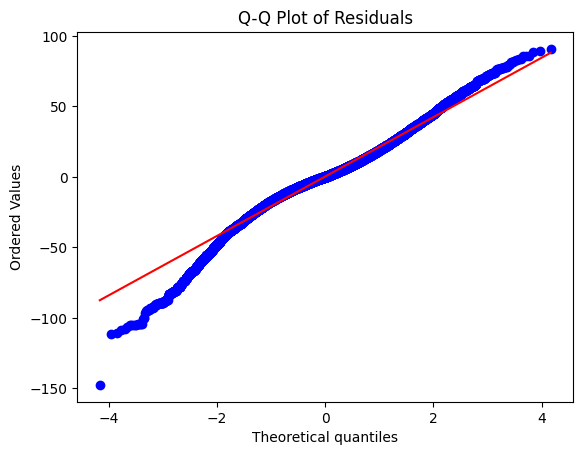

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


residuals = Y_test - y_pred

# Create Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


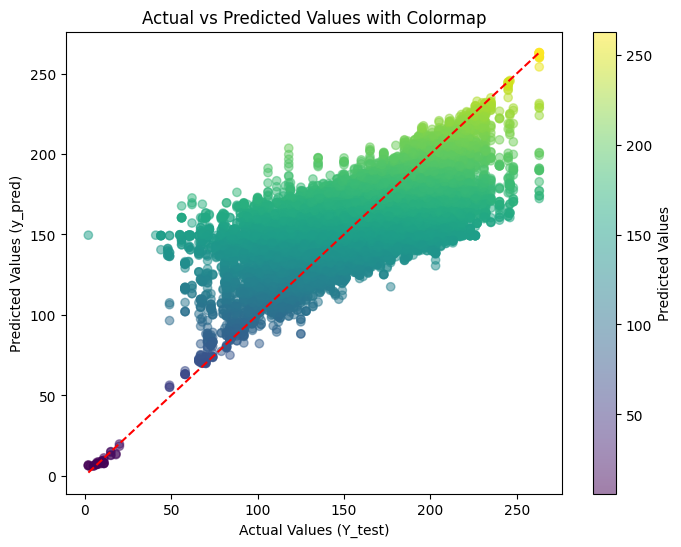

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


plt.figure(figsize=(8,6))


sc = plt.scatter(Y_test, y_pred, c=y_pred, cmap=cm.viridis, alpha=0.5)


plt.title("Actual vs Predicted Values with Colormap")
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (y_pred)")


plt.colorbar(sc, label='Predicted Values')


plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')

plt.show()


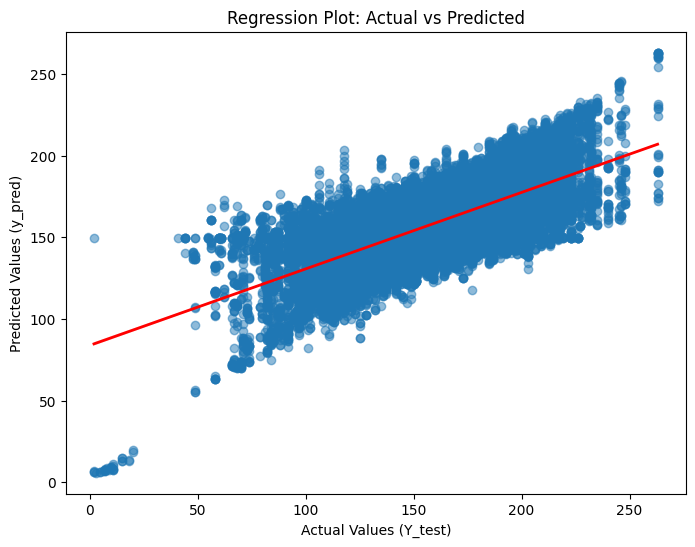

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))


sns.regplot(x=Y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'linewidth':2})


plt.title("Regression Plot: Actual vs Predicted")
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (y_pred)")


plt.show()


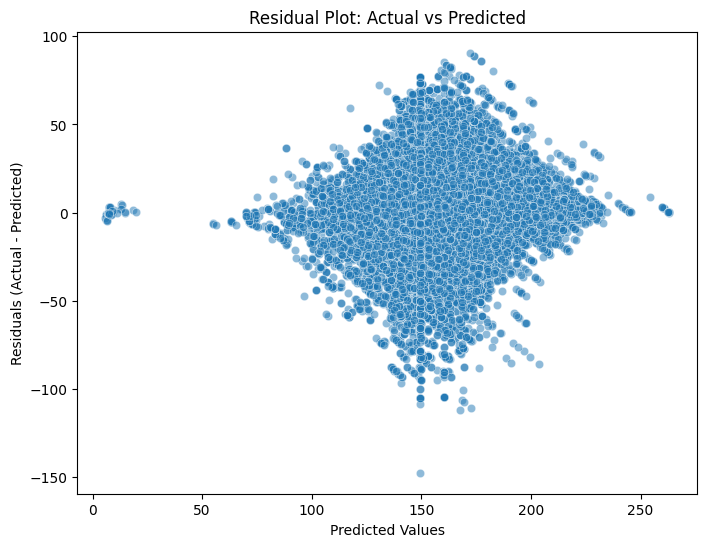

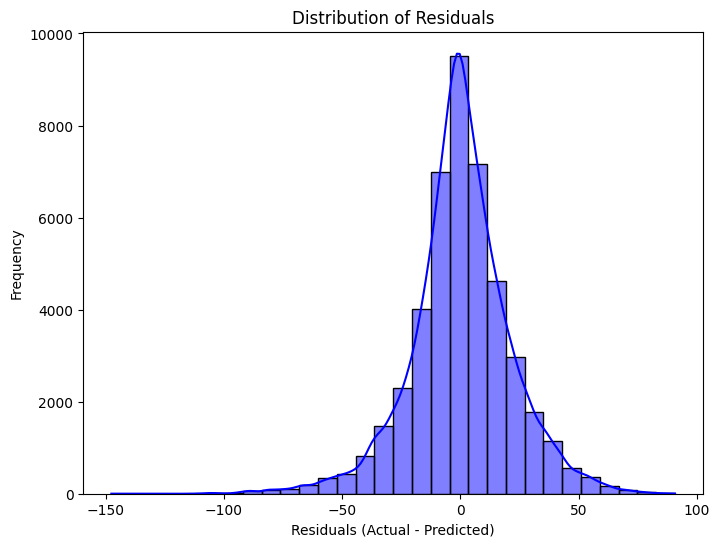

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

residuals = Y_test - y_pred


plt.figure(figsize=(8, 6))


sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)


plt.title("Residual Plot: Actual vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")


plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)

plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")


plt.show()


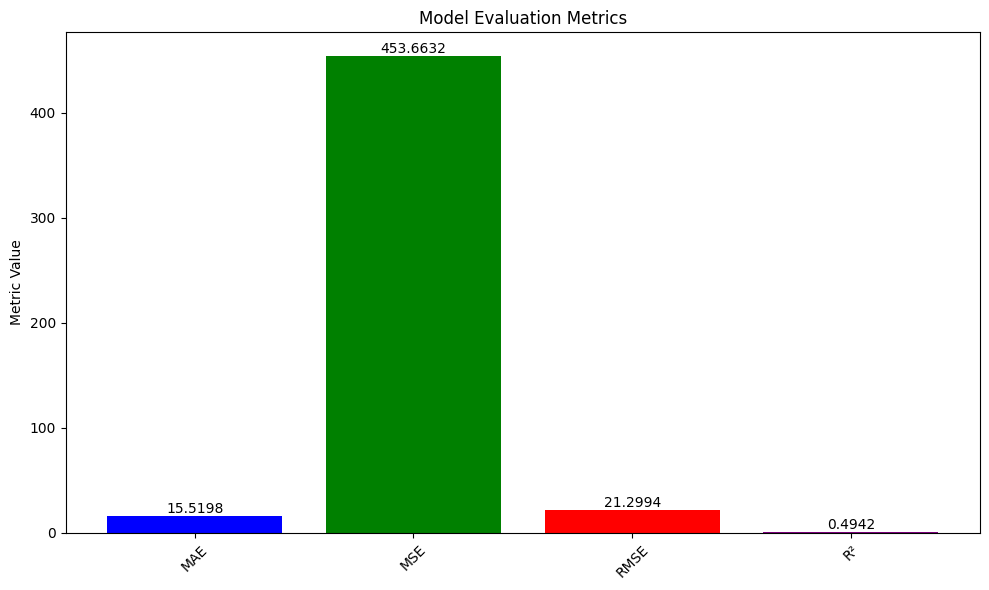

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae, mse, rmse, r2]


plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)


plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()
